# Data Preprocessing & EDA Summary

## Phase 1: Data Preprocessing

In [1]:
# Load required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from IPython.display import display_html

plt.style.use('dark_background')
palette = ["#FFA500", "#FFFFFF", "#FFDDC1", "#FFAB76"]

In [2]:
# Load data
policy_data = pd.read_csv('../data/all_policy.csv', sep=';', engine='python')
claims_data = pd.read_csv('../data/claims-report(14).csv.gz')

### Datetime Standardization
All relevant temporal columns were converted to timezone-naive datetime format to ensure consistency across the dataset.

In [3]:
# Standardize column names for all dataframes
def standardize_columns(df):
    df.columns = (
        df.columns.str.strip()                  # Remove leading/trailing spaces
        .str.lower()                            # Convert to lowercase
        .str.replace(' ', '_')                  # Replace spaces with underscores
        .str.replace(r'[^\w]', '', regex=True)  # Remove special characters
    )
    return df

# Apply the function to relevant dataframes
policy_data = standardize_columns(policy_data)
claims_data = standardize_columns(claims_data)

policy_data = policy_data.rename(columns={
    'policynr': 'policy_nr',
    'driverage': 'drive_age',
    'carweightmin': 'car_weight_min',
    'carmake': 'car_make'
})

In [4]:
def format_info(df):
    buf = io.StringIO()
    df.info(buf=buf)
    return f"<pre>{buf.getvalue()}</pre>"

def render_df_summary(df, title="Dataset"):
    html_head = df.head(5).to_html()
    html_desc = df.describe().to_html()
    html_info = format_info(df)

    return f"""
    <div style="padding: 1em; border: 1px solid #ddd; border-radius: 8px; margin-bottom: 2em;">
        <h3 style="margin-top: 0;">{title}</h3>
        <h4>.head()</h4>
        {html_head}
        <h4>.describe()</h4>
        {html_desc}
        <h4>.info()</h4>
        {html_info}
    </div>
    """

html_summary = render_df_summary(policy_data, "policy_data") + render_df_summary(claims_data, "claims_data")

display_html(html_summary, raw=True)

policy_data 
 .head() 
 
 
 
 
 policy_nr 
 policy_gwp 
 drive_age 
 postalcode 
 car_weight_min 
 car_make 
 policy_start_date 
 bonus_class_mtpl 
 
 
 
 
 0 
 81101474427 
 44636 
 70 
 1188.0 
 1075 
 SUZUKI 
 2024-09-27T00:00:00Z 
 B10 
 
 
 1 
 81101126118 
 55597 
 52 
 1112.0 
 1127 
 KIA 
 2024-08-15T00:00:00Z 
 B2 
 
 
 2 
 81101219426 
 23439 
 57 
 8415.0 
 1070 
 OPEL 
 2024-08-09T00:00:00Z 
 B8 
 
 
 3 
 81101704260 
 43491 
 74 
 2700.0 
 979 
 FORD 
 2024-10-26T00:00:00Z 
 B4 
 
 
 4 
 81101290690 
 49928 
 29 
 2200.0 
 1359 
 FORD 
 2024-08-22T00:00:00Z 
 B2 
 
 
 
 .describe() 
 
 
 
 
 policy_nr 
 policy_gwp 
 drive_age 
 postalcode 
 car_weight_min 
 
 
 
 
 count 
 1.423090e+05 
 1.423090e+05 
 142309.000000 
 142290.000000 
 142309.000000 
 
 
 mean 
 8.110101e+10 
 4.095014e+04 
 46.419608 
 4405.444740 
 1310.376399 
 
 
 std 
 4.349718e+05 
 2.013921e+04 
 12.942099 
 2776.318521 
 276.827425 
 
 
 min 
 8.110000e+10 
 -6.167800e+04 
 15.000000 
 1011.000000 
 1.000000 
 
 
 25% 
 8.110064e+10 
 2.790700e+04 
 37.000000 
 2097.000000 
 1101.000000 
 
 
 50% 
 8.110101e+10 
 3.700200e+04 
 46.000000 
 3700.000000 
 1290.000000 
 
 
 75% 
 8.110138e+10 
 5.015900e+04 
 54.000000 
 6795.000000 
 1488.000000 
 
 
 max 
 8.110175e+10 
 1.086986e+06 
 120.000000 
 9985.000000 
 5434.000000 
 
 
 
 .info() 
 
RangeIndex: 142309 entries, 0 to 142308
Data columns (total 8 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 policy_nr 142309 non-null int64 
 1 policy_gwp 142309 non-null int64 
 2 drive_age 142309 non-null int64 
 3 postalcode 142290 non-null float64
 4 car_weight_min 142309 non-null int64 
 5 car_make 142308 non-null object 
 6 policy_start_date 142309 non-null object 
 7 bonus_class_mtpl 142309 non-null object 
dtypes: float64(1), int64(4), object(3)
memory usage: 8.7+ MB
 
 
 
 
 claims_data 
 .head() 
 
 
 
 
 policy_number 
 claim_number 
 claim_occurrence 
 claim_reported 
 fnol_reserve 
 first_touch_reserve 
 first_touch_date 
 first_payout 
 first_payout_date 
 last_payout_date 
 actual_reserve 
 actual_sum_of_payouts 
 
 
 
 
 0 
 8.110148e+10 
 10000001059 
 2024-10-22 00:00:00 
 2024-11-05 11:26:22 
 599000 
 NaN 
 2024-11-08 13:42:23 
 603000 
 2024-11-18 17:00:32 
 2024-11-18 17:00:32 
 367000 
 603000.0 
 
 
 1 
 8.110150e+10 
 10000001821 
 2025-01-06 00:00:00 
 2025-01-14 10:27:37 
 599000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 599000 
 0.0 
 
 
 2 
 8.110197e+10 
 10000001487 
 2024-12-05 00:00:00 
 2024-12-14 10:29:12 
 599000 
 NaN 
 2025-01-17 11:20:56 
 NaN 
 NaN 
 NaN 
 378000 
 0.0 
 
 
 3 
 8.110039e+10 
 10000000175 
 2024-06-25 00:00:00 
 2024-06-25 12:41:51 
 699000 
 2953000.0 
 2024-07-02 14:18:45 
 285149 
 2024-07-22 11:59:20 
 2024-07-22 11:59:20 
 79000 
 285149.0 
 
 
 4 
 8.110083e+10 
 10000001887 
 2025-01-14 00:00:00 
 2025-01-17 09:45:47 
 599000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 599000 
 0.0 
 
 
 
 .describe() 
 
 
 
 
 policy_number 
 fnol_reserve 
 first_touch_reserve 
 actual_reserve 
 actual_sum_of_payouts 
 
 
 
 
 count 
 2.025000e+03 
 2.029000e+03 
 4.640000e+02 
 2.029000e+03 
 2.029000e+03 
 
 
 mean 
 8.110102e+10 
 7.994613e+05 
 7.778468e+05 
 4.595977e+05 
 3.150956e+05 
 
 
 std 
 5.245134e+05 
 1.075645e+06 
 1.045207e+06 
 9.552427e+05 
 6.210573e+05 
 
 
 min 
 8.110000e+10 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 25% 
 8.110059e+10 
 5.990000e+05 
 3.000000e+05 
 0.000000e+00 
 0.000000e+00 
 
 
 50% 
 8.110093e+10 
 5.990000e+05 
 5.000000e+05 
 1.020000e+05 
 5.090000e+04 
 
 
 75% 
 8.110137e+10 
 6.990000e+05 
 9.000000e+05 
 5.990000e+05 
 3.900340e+05 
 
 
 max 
 8.110266e+10 
 3.000000e+07 
 1.507800e+07 
 1.492770e+07 
 8.871807e+06 
 
 
 
 .info() 
 
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 policy_number 2025 non-null float64
 1 claim_number 2029 non-null object 
 2 claim_occurrence 2021 non-nu

In [5]:
# Drop duplicates from merged_data
policy_data, claims_data = policy_data.drop_duplicates(), claims_data.drop_duplicates()

### 	Missing Value Handling and Feature Engineering

In [6]:
# ===============================
# Data Preprocessing Pipeline
# ===============================

# Convert date columns to datetime

def convert_to_datetime(df, columns):
    """Convert specified columns to timezone-naive datetime."""
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce").dt.tz_localize(None)
    return df

# Handle missing values

def handle_missing_values(claims_df, policy_df):
    """Handle missing values in claims and policy dataframes."""
    claims_df.dropna(subset=["policy_number"], inplace=True)
    claims_df["policy_number"] = claims_df["policy_number"].astype("int64")
    claims_df.fillna({"first_touch_reserve": 0, "actual_sum_of_payouts": 0}, inplace=True)

    policy_df.fillna({
        "postalcode": policy_df["postalcode"].mode()[0],
        "car_make": "UNKNOWN"
    }, inplace=True)

    return claims_df, policy_df

# Postal code grouping

def group_postalcode(postalcode):
    """Group postal codes by their leading digit."""
    return 0 if postalcode < 1000 else int(str(int(postalcode))[0])

# Merge datasets and feature engineering

def encode_and_merge(claims_df, policy_df):
    """Merge datasets and create derived features."""
    policy_df['postalcode_group'] = policy_df['postalcode'].astype(int).apply(group_postalcode)

    merged = claims_df.merge(
        policy_df,
        left_on="policy_number", right_on="policy_nr",
        how="inner", suffixes=("", "_policy")
    )

    # Derived temporal features
    merged["notification_delay_days"] = (merged["claim_reported"] - merged["claim_occurrence"]).dt.days
    merged["days_since_policy_start"] = (merged["claim_occurrence"] - merged["policy_start_date"]).dt.days

    # Derived financial features
    merged["final_loss"] = merged["actual_reserve"] + merged["actual_sum_of_payouts"]

    # Claim count per policy event
    merged["claims_per_policy_event"] = merged.groupby(["policy_number", "claim_occurrence"])["claim_number"].transform("count")

    # Extract claim suffix
    merged['claim_suffix'] = merged['claim_number'].str.extract(r'/(\d+)$').fillna('0').astype(int)

    # Log-transformation of financial features
    merged["log_fnol_reserve"] = np.log1p(merged["fnol_reserve"])
    merged["log_final_loss"] = np.log1p(merged["final_loss"])

    # Temporal categorical features
    merged["claim_month"] = merged["claim_occurrence"].dt.month
    merged["claim_weekday"] = merged["claim_occurrence"].dt.weekday + 1

    # Bonus class encoding
    merged['bonus_class_encoded'] = merged['bonus_class_mtpl'].str.extract(r'(\d+)')[0].fillna(0).astype(int)

    # Final postal code merge (consistency)
    merged = merged.merge(
        policy_df[["policy_nr", "postalcode_group"]],
        left_on="policy_number", right_on="policy_nr",
        how="left", suffixes=("", "_duplicate")
    ).drop(["policy_nr", "policy_nr_duplicate"], axis=1, errors='ignore')

    # 3-month rolling claim count per policy
    merged = merged.dropna(subset=["claim_occurrence"])
    merged = merged.sort_values(by=["policy_number", "claim_occurrence"]).copy()

    # rolling count as separate Series with aligned index
    rolling_counts = (
        merged
        .set_index("claim_occurrence")
        .groupby("policy_number")["claim_number"]
        .rolling("90D")
        .count()
        .reset_index(level=0, drop=True)
        .sort_index()
        .astype(int)
    )

    # assign it back safely
    merged["3m_claim_count"] = rolling_counts.values

    return merged

# Float to integer conversion where applicable

def convert_floats_to_ints(df):
    """Convert float columns to integers if all values are integer-like."""
    float_cols = df.select_dtypes(include=['float']).columns
    for col in float_cols:
        if df[col].dropna().apply(float.is_integer).all():
            df[col] = df[col].fillna(0).astype('int64')
    return df

# Main execution

date_columns = [
    "claim_occurrence", "claim_reported", "first_touch_date", 
    "first_payout_date", "last_payout_date", "policy_start_date"
]

claims_data = convert_to_datetime(claims_data, date_columns)
policy_data = convert_to_datetime(policy_data, date_columns)

claims_data, policy_data = handle_missing_values(claims_data, policy_data)

merged_data = encode_and_merge(claims_data, policy_data)

claims_data = convert_floats_to_ints(claims_data)
policy_data = convert_floats_to_ints(policy_data)
merged_data = convert_floats_to_ints(merged_data)

merged_data

,policy_number,claim_number,claim_occurrence,claim_reported,fnol_reserve,first_touch_reserve,first_touch_date,first_payout,first_payout_date,last_payout_date,...,final_loss,claims_per_policy_event,claim_suffix,log_fnol_reserve,log_final_loss,claim_month,claim_weekday,bonus_class_encoded,postalcode_group_duplicate,3m_claim_count
1172,81100003136,10000000056,2024-05-20,2024-05-24 09:18:26,699000,300000,2024-05-31 10:27:01,131129,2024-06-20 13:27:44,2024-06-20 13:27:44,...,210129.0,1,0,13.457407,12.255482,5,1,0,4,1
984,81100006089,10000000039,2024-05-14,2024-05-17 11:37:28,699000,1894000,2024-05-27 15:37:40,25400,2024-06-20 13:22:14,2024-08-27 15:19:48,...,1924531.0,1,0,13.457407,14.470193,5,2,2,1,1
1529,81100007319,10000000042,2024-05-18,2024-05-21 11:12:19,699000,710000,2024-05-30 17:18:16,374026,2024-07-01 14:30:59,2024-07-01 14:30:59,...,453026.0,1,0,13.457407,13.023707,5,6,5,3,1
728,81100007525,10000000602,2024-08-06,2024-09-13 13:00:39,2799000,0,2024-10-18 09:32:17,NaN,NaT,NaT,...,1869000.0,1,0,14.844773,14.440915,8,2,2,2,1
1243,81100008317,10000001692,2024-12-13,2025-01-06 13:11:17,599000,0,NaT,NaN,NaT,NaT,...,599000.0,1,0,13.303019,13.303019,12,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,81101740298,10000001387,2024-11-29,2024-12-05 07:49:00,599000,0,2024-12-16 14:54:43,NaN,NaT,NaT,...,220000.0,1,0,13.303019,12.301387,11,5,10,8,1
831,81101741296,10000001443,2024-11-28,2024-12-11 09:35:23,599000,0,2024-12-12 12:54:19,NaN,NaT,NaT,...,250000.0,1,0,13.303019,12.429220,11,4,10,2,1
445,81101741304,10000001469,2024-12-06,2024-12-12 14:18:43,599000,0,2025-01-07 08:35:30,95244,2025-01-07 08:35:05,2025-01-07 08:35:05,...,95244.0,1,0,13.303019,11.464208,12,5,0,6,1
1228,81101741742,10000001848,2025-01-07,2025-01-15 11:01:21,599000,0,NaT,NaN,NaT,NaT,...,599000.0,1,0,13.303019,13.303019,1,2,10,9,1


	•	In claims_data: Missing values in first_touch_reserve and actual_sum_of_payouts were imputed with zeros; records without policy_number were removed.
	•	In policy_data: Missing postalcode values were filled with the mode; missing car_make values were replaced with 'UNKNOWN'.

•	Temporal Features:

	•	notification_delay_days: Days between claim occurrence and notification.
	•	days_since_policy_start: Age of the policy at the time of the claim.
	•	claim_month and claim_weekday: Capture seasonal and weekday patterns.

•	Financial Features:

	•	final_loss: Sum of actual payouts and reserves.
	•	log_fnol_reserve, log_final_loss: Log-transformed for better distributional properties.

•	Structural Features:

	•	claims_per_policy_event: Number of claims reported for a policy on the same day.
	•	claim_suffix: Encoded suffix from the claim number to distinguish related claims.
	•	bonus_class_encoded: Encoded bonus-malus class.
	•	postalcode_group: First digit of the postal code to approximate geographic region.
	•	3m_claim_count: Rolling count of claims within the last 90 days per policy.

### Summary of Preprocessing Outcomes:

	•	The data has been successfully merged and aligned at the policy-claim level.
	•	Rich domain-specific features were engineered to reflect temporal, financial, and structural characteristics of the claims.
	•	The resulting dataset is robust, interpretable, and ready for predictive modeling.

## Exploratory Data Analysis (EDA)

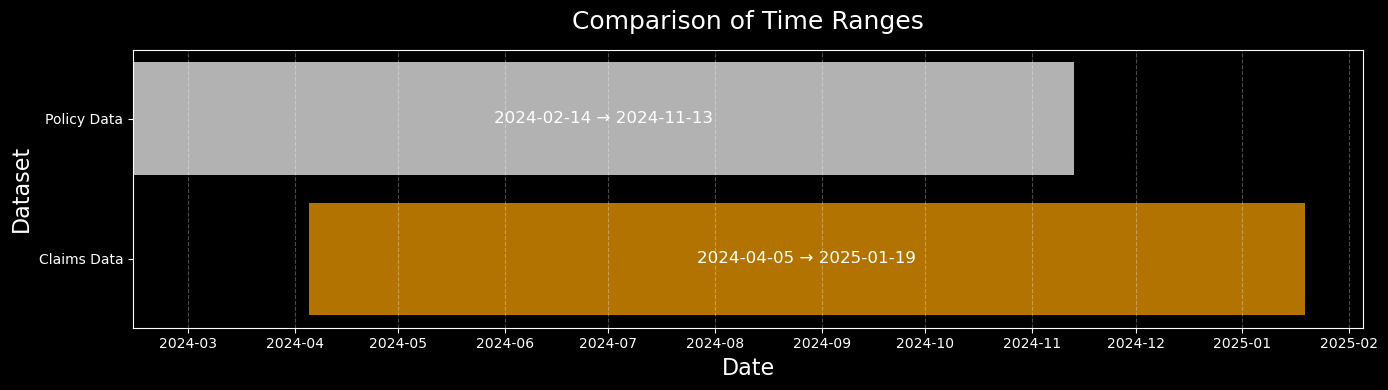

In [7]:
def plot_time_ranges(dataframes, date_columns, labels, bar_color='orange'):
    """
    Visualize the time ranges (min and max) of the given DataFrames.

    """
    fig, ax = plt.subplots(figsize=(14, 4))

    for idx, (df, date_col, label, color) in enumerate(zip(dataframes, date_columns, labels, palette)):
        if date_col in df.columns:
            min_date = df[date_col].min()
            max_date = df[date_col].max()
            duration = (max_date - min_date).days

            ax.barh(label, duration, left=min_date, color=color, alpha=0.7)
            ax.text(min_date + (max_date - min_date) / 2, idx,
                    f'{min_date:%Y-%m-%d} → {max_date:%Y-%m-%d}',
                    va='center', ha='center', fontsize=12, color='white')
        else:
            print(f"Warning: Column '{date_col}' not found in DataFrame '{label}'")

    ax.set_title("Comparison of Time Ranges", fontsize=18, pad=15)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel("Dataset", fontsize=16)
    ax.grid(axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_time_ranges(
    dataframes=[claims_data, policy_data],
    date_columns=["claim_occurrence", "policy_start_date", "claim_occurrence"],
    labels=["Claims Data", "Policy Data"]
)

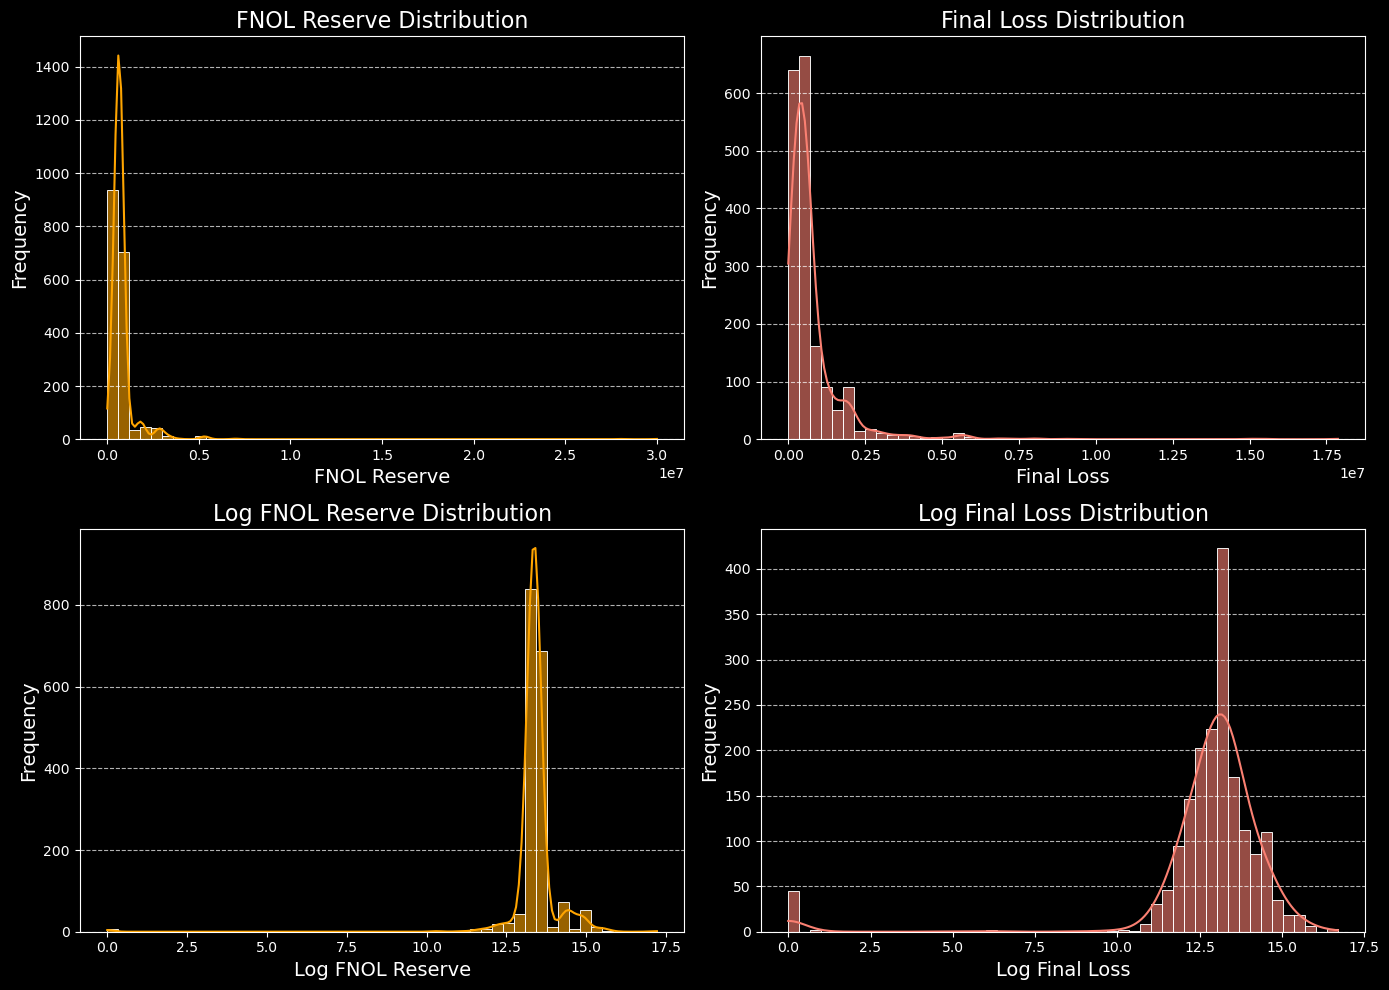

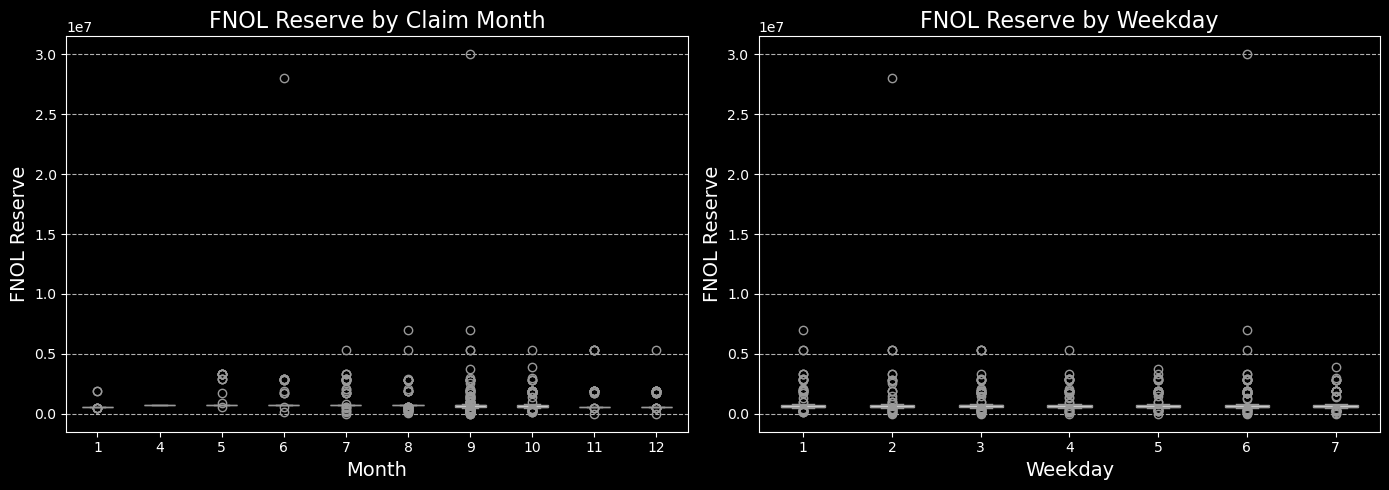

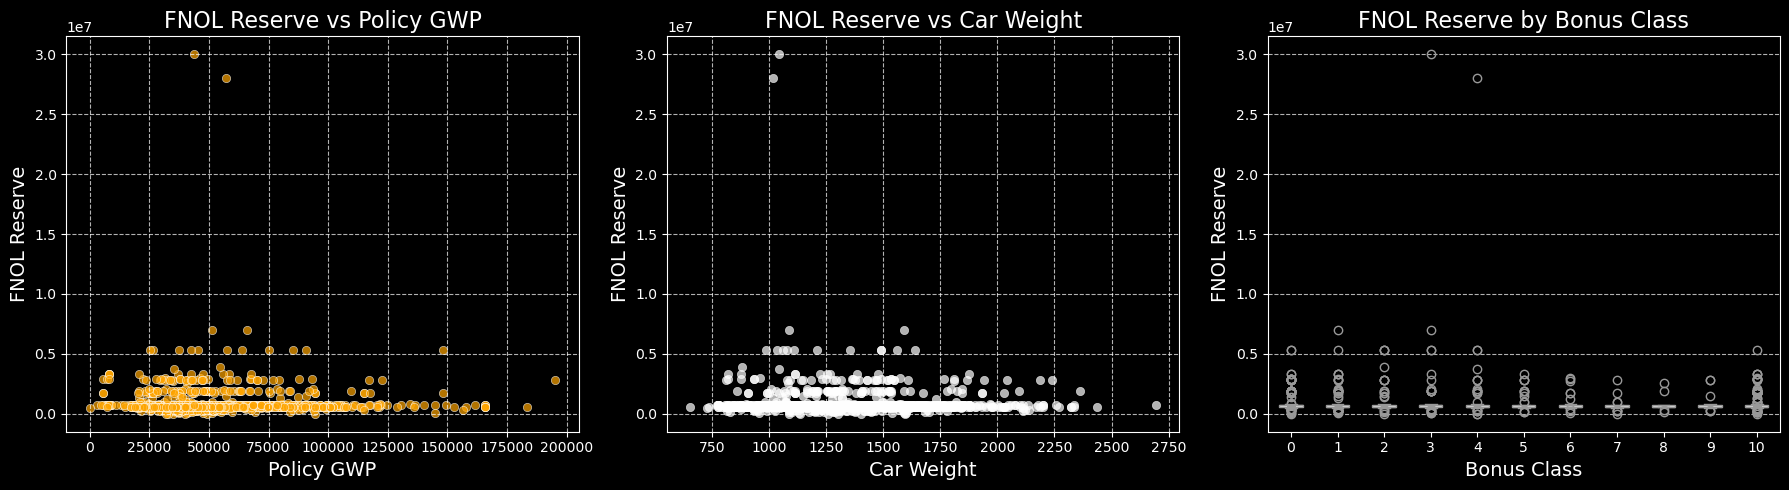

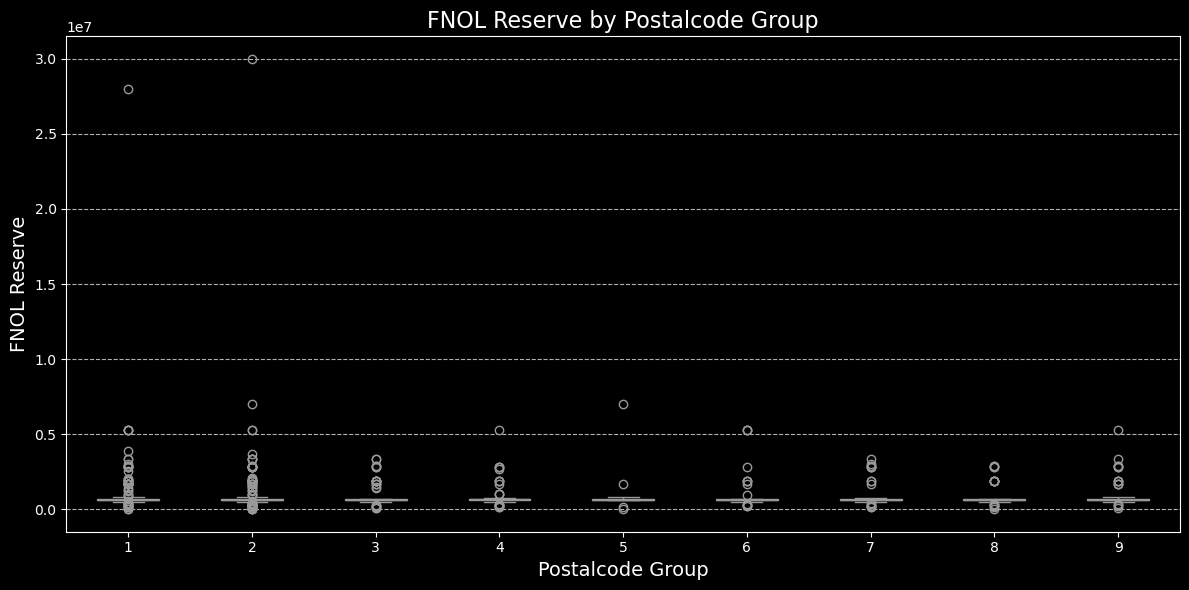

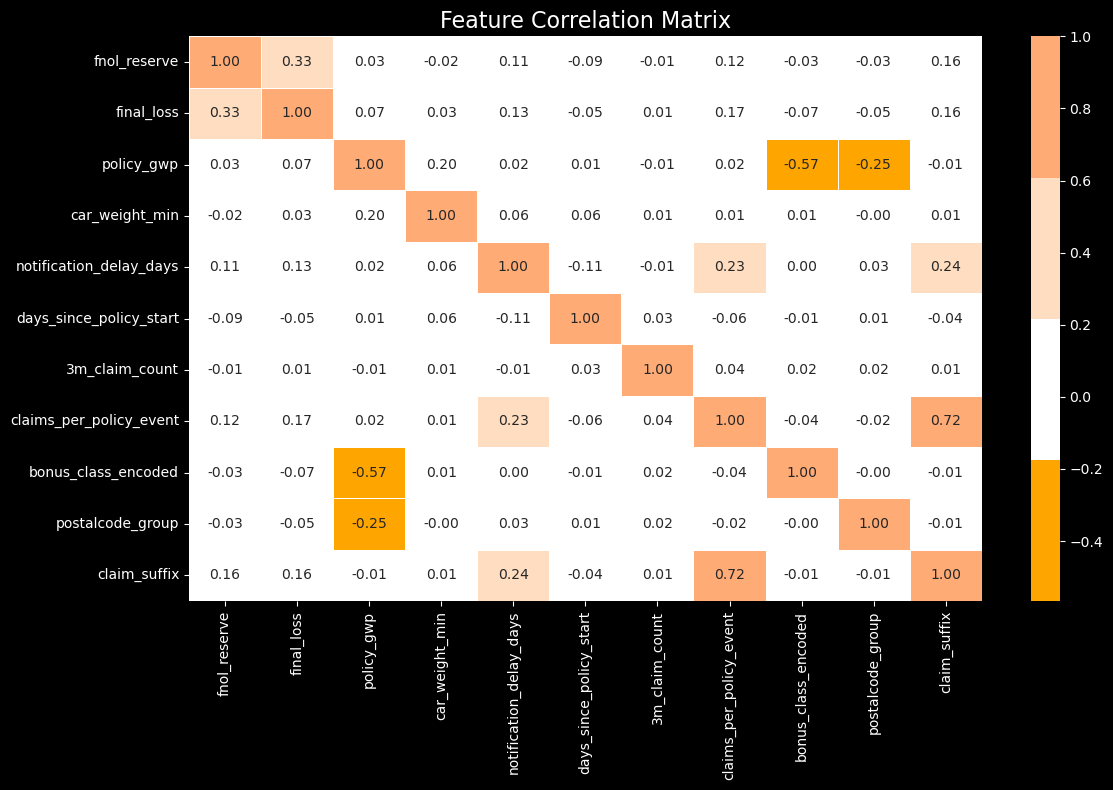

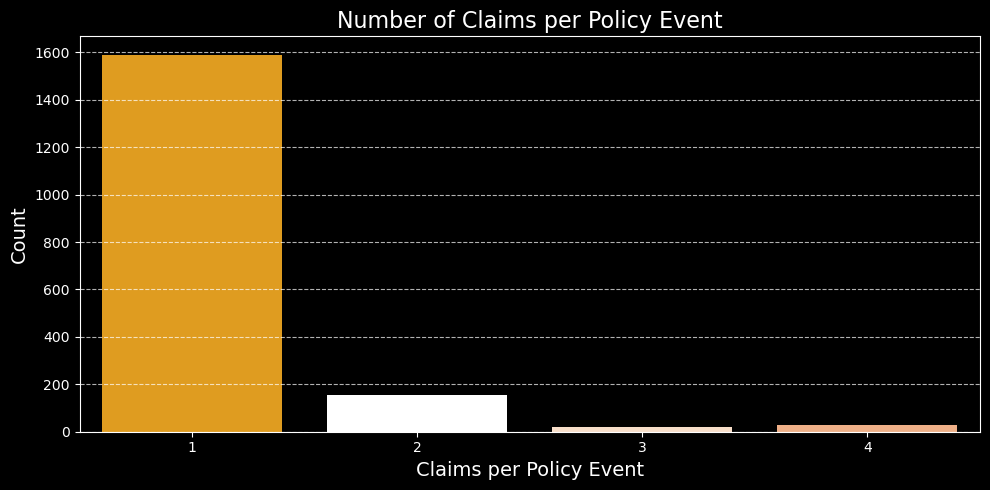

In [8]:
# Universal functions for graphing
def plot_hist(ax, data, title, xlabel, ylabel, color='orange'):
    sns.histplot(data, bins=50, kde=True, ax=ax, color=color, alpha=0.6)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

def plot_box(ax, x, y, data, title, xlabel, ylabel, color='white'):
    sns.boxplot(x=x, y=y, data=data, ax=ax, color=color, width=0.5)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Distribution graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_hist(axes[0, 0], merged_data['fnol_reserve'], 'FNOL Reserve Distribution', 'FNOL Reserve', 'Frequency')
plot_hist(axes[0, 1], merged_data['final_loss'], 'Final Loss Distribution', 'Final Loss', 'Frequency', color='salmon')
plot_hist(axes[1, 0], merged_data['log_fnol_reserve'], 'Log FNOL Reserve Distribution', 'Log FNOL Reserve', 'Frequency')
plot_hist(axes[1, 1], merged_data['log_final_loss'], 'Log Final Loss Distribution', 'Log Final Loss', 'Frequency', color='salmon')

plt.tight_layout()
plt.show()

# Influence of time factors
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_box(axes[0], 'claim_month', 'fnol_reserve', merged_data, 'FNOL Reserve by Claim Month', 'Month', 'FNOL Reserve')
plot_box(axes[1], 'claim_weekday', 'fnol_reserve', merged_data, 'FNOL Reserve by Weekday', 'Weekday', 'FNOL Reserve')

plt.tight_layout()
plt.show()

# The effect of policy features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='policy_gwp', y='fnol_reserve', data=merged_data, ax=axes[0], color='orange', alpha=0.7)
axes[0].set_title('FNOL Reserve vs Policy GWP', fontsize=16)
axes[0].set_xlabel('Policy GWP', fontsize=14)
axes[0].set_ylabel('FNOL Reserve', fontsize=14)
axes[0].grid(linestyle='--', alpha=0.7)

sns.scatterplot(x='car_weight_min', y='fnol_reserve', data=merged_data, ax=axes[1], color='white', alpha=0.7)
axes[1].set_title('FNOL Reserve vs Car Weight', fontsize=16)
axes[1].set_xlabel('Car Weight', fontsize=14)
axes[1].set_ylabel('FNOL Reserve', fontsize=14)
axes[1].grid(linestyle='--', alpha=0.7)

plot_box(axes[2], 'bonus_class_encoded', 'fnol_reserve', merged_data, 'FNOL Reserve by Bonus Class', 'Bonus Class', 'FNOL Reserve')

plt.tight_layout()
plt.show()

# Geographical distribution
plt.figure(figsize=(12, 6))
plot_box(plt.gca(), 'postalcode_group', 'fnol_reserve', merged_data, 'FNOL Reserve by Postalcode Group', 'Postalcode Group', 'FNOL Reserve')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_features = ['fnol_reserve', 'final_loss', 'policy_gwp', 'car_weight_min',
                    'notification_delay_days', 'days_since_policy_start', '3m_claim_count',
                    'claims_per_policy_event', 'bonus_class_encoded', 'postalcode_group', 'claim_suffix']

corr_matrix = merged_data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=palette, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Number of applications per policy
plt.figure(figsize=(10, 5))
sns.countplot(x='claims_per_policy_event', data=merged_data, hue='claims_per_policy_event', palette=palette, legend=False)
plt.title('Number of Claims per Policy Event', fontsize=16)
plt.xlabel('Claims per Policy Event', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

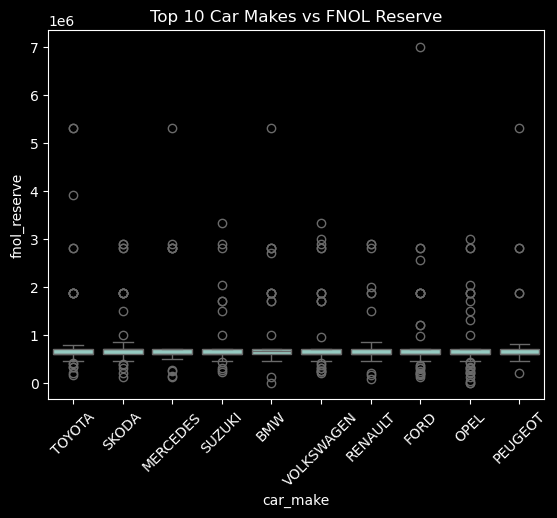

In [9]:
top_makes = merged_data['car_make'].value_counts().head(10).index
sns.boxplot(data=merged_data[merged_data['car_make'].isin(top_makes)],
            x='car_make', y='fnol_reserve')
plt.xticks(rotation=45)
plt.title("Top 10 Car Makes vs FNOL Reserve")
plt.show()

Correlation Analysis

	•	Moderate correlations were observed between final_loss and predictors such as policy_gwp, notification_delay_days, and car_weight_min.
	•	fnol_reserve, however, showed weaker linear correlations, indicating the need for non-linear modeling approaches.

Seasonality

	•	Clear seasonal patterns were identified across months and weekdays, suggesting cyclical trends in claim frequency and magnitude.

Categorical Feature Insights

	•	Variations in claim costs were observed across different car_make and bonus_class_mtpl groups.
	•	This validates the importance of these categorical variables as predictors in the modeling pipeline.

Outlier Analysis

	•	Given their domain relevance, these outliers were retained, but appropriately handled using log transformation and will be further mitigated via Winsorization when applying Generalized Linear Models.

### EDA Insights and Business Implications:

	•	The dataset reflects typical characteristics of insurance loss data: long-tailed distributions, seasonal behaviors, and strong heterogeneity across regions and vehicle classes.
	•	Special attention should be given to modeling strategies that can handle high variance, non-linearity, and rare-but-severe events (e.g., extreme losses).
	•	The presence of multiple claims per policy and rapid claim succession (captured via 3m_claim_count) suggests underlying behavioral or fraud-related patterns worth monitoring in production.

In [10]:
merged_data.to_csv('../data/merged_data.csv', index=False)